$ f(x) = \beta_0 + \large \sum\limits_{{i \in \mathbb{S}}} \normalsize \alpha_i K(x, x_i)$

where,

* $f(x)$ is the **decision value** that compares the similarity of vector $x$ to all **support vectors** $x_i$.
* $\beta_0$ is the **bias** coefficient.
* $\mathbb{S}$ is the set of **support vectors**.
* $\alpha_i$ are the **coefficients** corresponding to each support vector $x_i$.
* $K(x, x_i)$ is the **kernel** function, which is generally a non-linear function of the dot product of $x$ and $x_i$

**Then, the optimization problem is:**

$\text{maximize}_{\beta_0, \alpha_1, \cdots, \alpha_n} \quad M$

$\text{subject to:}$

$ y_i f(x_i) \ge M (1 - \epsilon_i), $

$ \large\sum\limits_{i=1}^n \normalsize \epsilon_i \le C , \quad \epsilon_i \ge 0 $

In [38]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

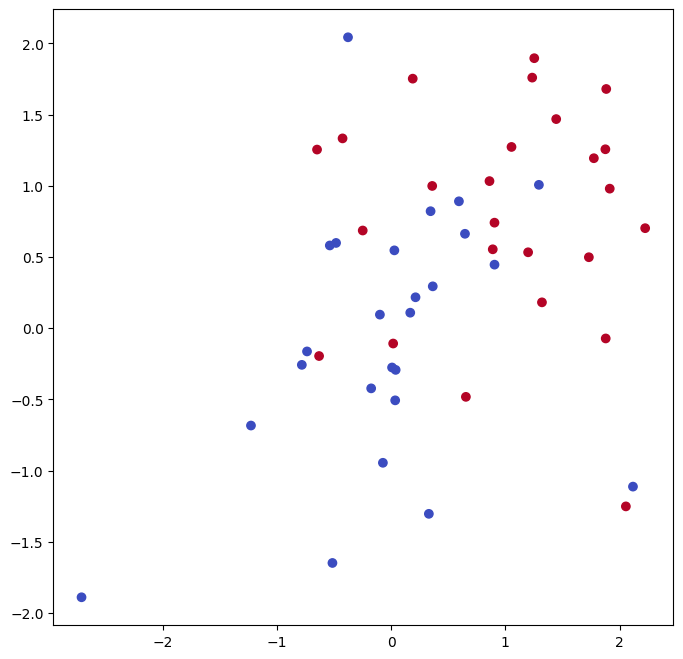

In [39]:
roc_curve = RocCurveDisplay.from_estimator # shorthand

rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm);

In [40]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

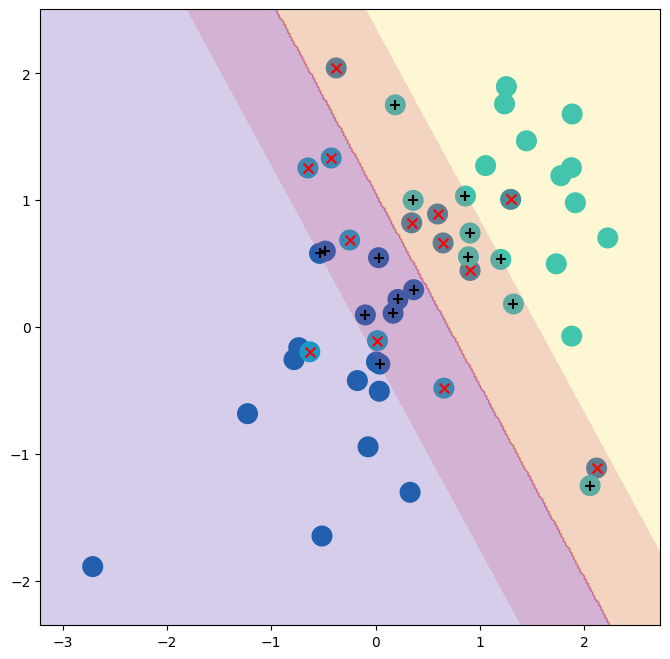

In [41]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear,
ax=ax)

Support vectors are marked with $(+)$

In [42]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

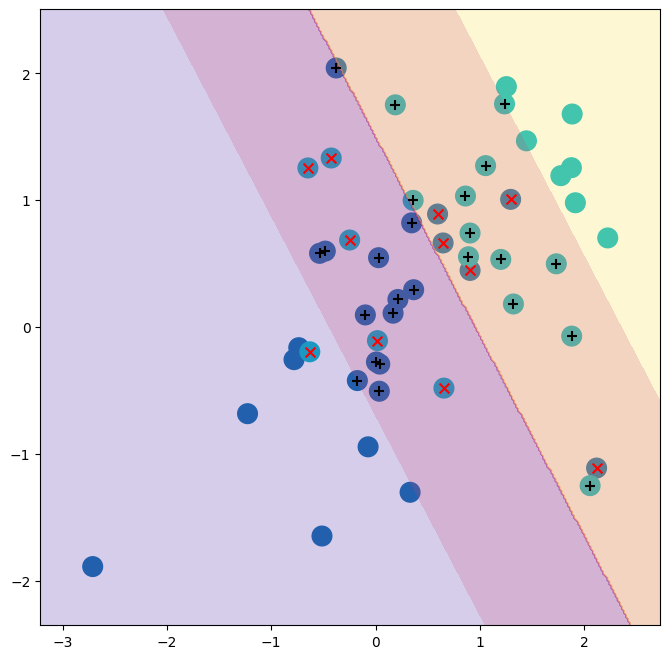

In [43]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear_small,
ax=ax)

In [44]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_linear,
{'C':[0.001,0.01,0.1,1,5,10,100]},
refit=True,
cv=kfold,
scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [45]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [46]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1

print(X_test)

[[-6.51281012e-01  8.62444796e-01]
 [-1.25592084e-01  6.69153241e-01]
 [ 1.21884361e+00  3.82929583e-01]
 [-8.75721143e-01 -1.51431863e+00]
 [ 1.75338412e+00 -1.11292193e-01]
 [-6.88564948e-01  1.44257088e-01]
 [-1.91411330e-01  8.52142264e-01]
 [ 3.39281824e-02  1.37495836e-02]
 [-7.14579721e-01  4.69568099e-01]
 [-1.03386672e+00  6.65889440e-01]
 [ 2.52393751e+00 -5.24686038e-01]
 [-1.46622923e+00  1.61687876e+00]
 [ 3.54789782e+00 -9.24848872e-04]
 [-2.50695759e-01  1.58896893e+00]
 [ 1.59278410e-01  4.93974516e-01]
 [ 6.51882533e-01  1.53200209e+00]
 [ 5.94697639e-01  1.27788284e+00]
 [ 8.23466741e-01  1.55328896e-01]
 [ 6.80173742e-01  4.96003348e-02]
 [ 1.00651499e+00 -1.23866228e-01]]


=== RBF Kernel (Radial Data) - Confusion Table ===
Truth        0   1
Predicted         
0          123   1
1            2  24

=== Polynomial Kernel (Cubic Data) - Confusion Table ===
Truth       0   1
Predicted        
0          68   0
1           9  73


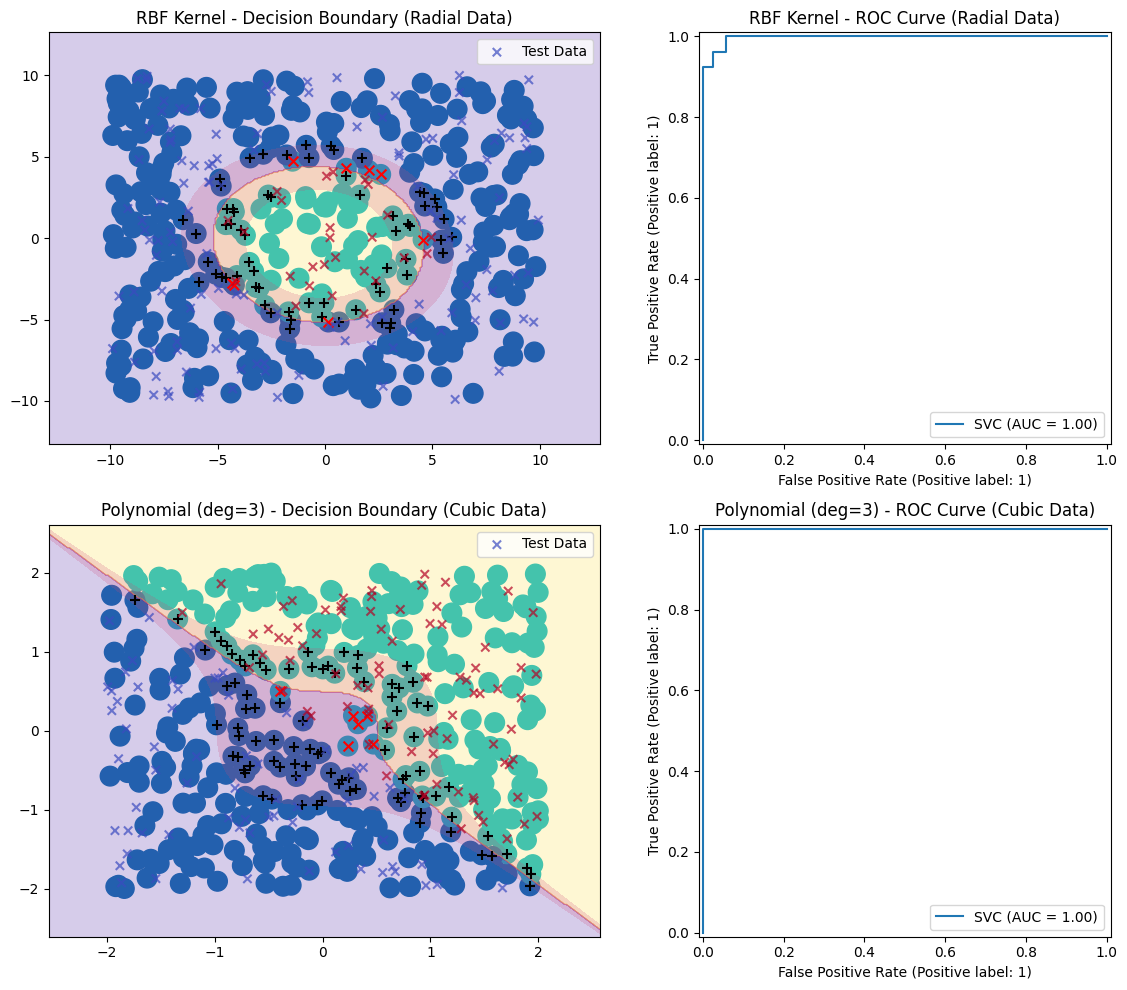

In [47]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay


def generate_radial_data(n_samples=300, radius=5.0, random_state=0):
    """
    Generates 2D points along with binary labels indicating
    whether each point lies inside or outside a given radius
    from the origin (0,0).
    """
    rng = np.random.RandomState(random_state)
    X = rng.uniform(-10, 10, size=(n_samples, 2))
    distances = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    y = (distances < radius).astype(int)  # label 1 if inside circle, else 0
    return X, y

def generate_cubic_data(n_samples=300, random_state=0):
    """
    Generates 2D points along with binary labels defined by
    a cubic function: label 1 if x1^3 + x2^3 > 0, else 0.
    """
    rng = np.random.RandomState(random_state)
    X = rng.uniform(-2, 2, size=(n_samples, 2))
    cubic_sum = X[:, 0]**3 + X[:, 1]**3
    y = (cubic_sum > 0).astype(int)  # label 1 if sum of cubes > 0
    return X, y


X_rad, y_rad = generate_radial_data(n_samples=500, radius=5.0, random_state=42)
X_cub, y_cub = generate_cubic_data(n_samples=500, random_state=24)

X_train_rad, X_test_rad, y_train_rad, y_test_rad = skm.train_test_split(
    X_rad, y_rad, test_size=0.3, random_state=42
)
X_train_cub, X_test_cub, y_train_cub, y_test_cub = skm.train_test_split(
    X_cub, y_cub, test_size=0.3, random_state=42
)

svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale',
                probability=True, random_state=42)
svm_rbf.fit(X_train_rad, y_train_rad)

svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale',
                probability=True, random_state=42)
svm_poly.fit(X_train_cub, y_train_cub)

y_pred_rad = svm_rbf.predict(X_test_rad)
y_pred_cub = svm_poly.predict(X_test_cub)

print("=== RBF Kernel (Radial Data) - Confusion Table ===")
print(confusion_table(y_test_rad, y_pred_rad))
print("\n=== Polynomial Kernel (Cubic Data) - Confusion Table ===")
print(confusion_table(y_test_cub, y_pred_cub))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].set_title("RBF Kernel - Decision Boundary (Radial Data)")
plot_svm(X_train_rad, y_train_rad, svm_rbf, ax=axes[0, 0])

# Overlay the test points
axes[0, 0].scatter(X_test_rad[:, 0], X_test_rad[:, 1],
                    c=y_test_rad, marker='x',
                    cmap='coolwarm', alpha=0.7, label='Test Data')
axes[0, 0].legend()

axes[0, 1].set_title("RBF Kernel - ROC Curve (Radial Data)")
RocCurveDisplay.from_estimator(svm_rbf, X_test_rad, y_test_rad, ax=axes[0, 1])


axes[1, 0].set_title("Polynomial (deg=3) - Decision Boundary (Cubic Data)")
plot_svm(X_train_cub, y_train_cub, svm_poly, ax=axes[1, 0])

axes[1, 0].scatter(X_test_cub[:, 0], X_test_cub[:, 1],
                    c=y_test_cub, marker='x',
                    cmap='coolwarm', alpha=0.7, label='Test Data')
axes[1, 0].legend()

axes[1, 1].set_title("Polynomial (deg=3) - ROC Curve (Cubic Data)")
RocCurveDisplay.from_estimator(svm_poly, X_test_cub, y_test_cub, ax=axes[1, 1])

plt.tight_layout()
plt.show()

RBF (Radial) Confusion Table:
Truth        0   1
Predicted         
0          123   1
1            2  24

Polynomial (deg=3) Confusion Table:
Truth       0   1
Predicted        
0          61   8
1          10  71


C:\Users\adevr\AppData\Local\Temp\ipykernel_11500\3111707418.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0, 0].legend()
C:\Users\adevr\AppData\Local\Temp\ipykernel_11500\3111707418.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1, 0].legend()


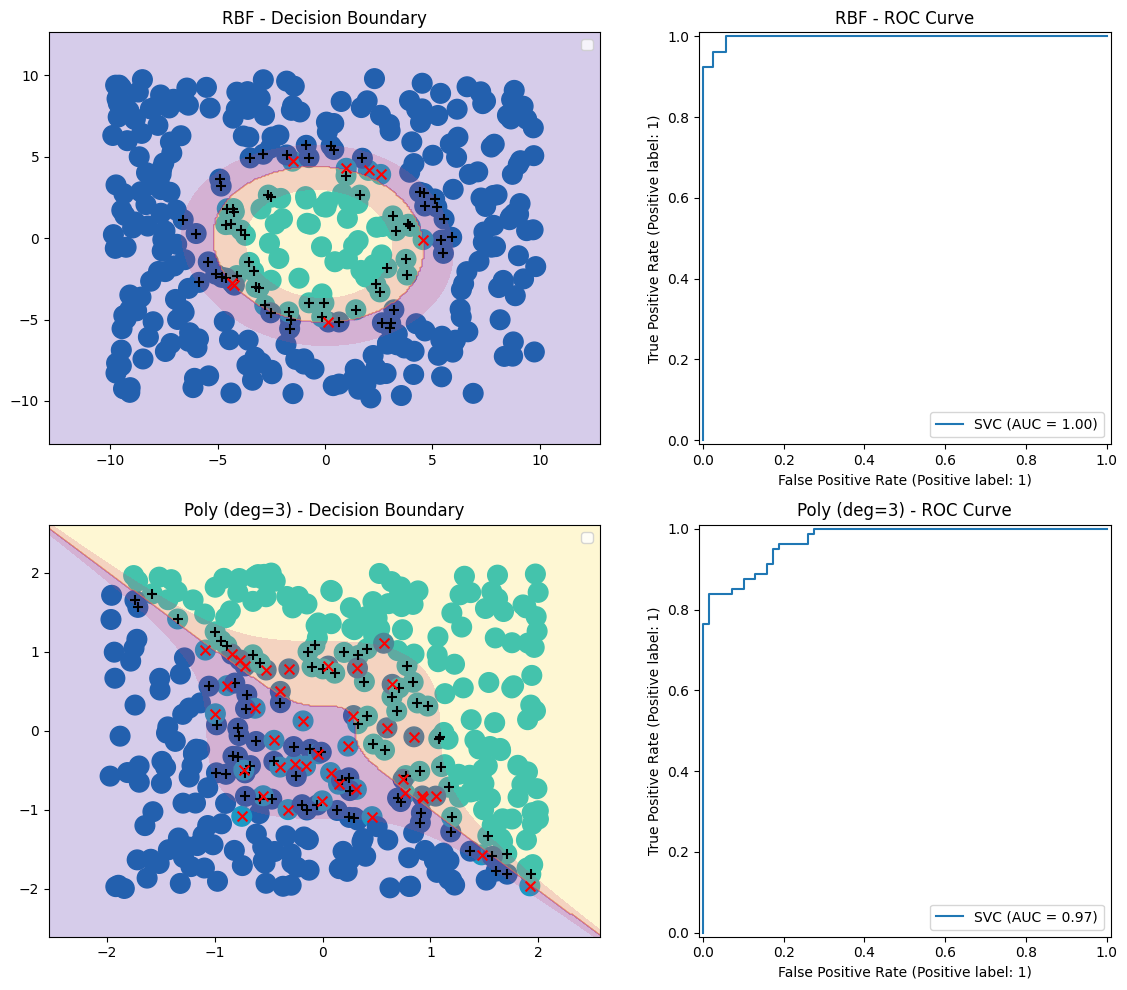

In [49]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

def generate_radial_data(n_samples=300, radius=5.0, random_state=0):
    # Generates noisy radial data for using radial kernel function SVM
    rng = np.random.RandomState(random_state)
    X = rng.uniform(-10, 10, size=(n_samples, 2))
    dist = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    y = (dist < radius).astype(int)
    return X, y

def generate_cubic_data(n_samples=300, random_state=0, noise_scale=1.0):
    # Generates cubically seperable data with some noise, to use degree 3 polynomial kernel function SVM
    rng = np.random.RandomState(random_state)
    X = rng.uniform(-2, 2, size=(n_samples, 2))
    cubic_sum = X[:, 0]**3 + X[:, 1]**3 + rng.normal(0, noise_scale, size=n_samples)
    y = (cubic_sum > 0).astype(int)
    return X, y

# Generate data
X_rad, y_rad = generate_radial_data(n_samples=500, radius=5.0, random_state=42)
X_cub, y_cub = generate_cubic_data(n_samples=500, random_state=24, noise_scale=1.0)

# Split data into training and test sets
X_train_rad, X_test_rad, y_train_rad, y_test_rad = skm.train_test_split(
    X_rad, y_rad, test_size=0.3, random_state=42
)
X_train_cub, X_test_cub, y_train_cub, y_test_cub = skm.train_test_split(
    X_cub, y_cub, test_size=0.3, random_state=42
)

# Use SVC class from sklearn library to fit SVM with different choice of kernel functions
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_rbf.fit(X_train_rad, y_train_rad)
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', probability=True, random_state=42)
svm_poly.fit(X_train_cub, y_train_cub)

# Get class predictions for test datasets
y_pred_rad = svm_rbf.predict(X_test_rad)
y_pred_cub = svm_poly.predict(X_test_cub)

# Print confusion tables to show accuracy
print("RBF (Radial) Confusion Table:")
print(confusion_table(y_test_rad, y_pred_rad))
print("\nPolynomial (deg=3) Confusion Table:")
print(confusion_table(y_test_cub, y_pred_cub))

# Plotting decision boundaries and performance curves

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].set_title("RBF - Decision Boundary")
plot_svm(X_train_rad, y_train_rad, svm_rbf, ax=axes[0, 0])
# axes[0, 0].scatter(X_test_rad[:, 0], X_test_rad[:, 1], c=y_test_rad, marker='x', cmap='coolwarm', alpha=0.7)
axes[0, 0].legend()

axes[0, 1].set_title("RBF - ROC Curve")
RocCurveDisplay.from_estimator(svm_rbf, X_test_rad, y_test_rad, ax=axes[0, 1])

axes[1, 0].set_title("Poly (deg=3) - Decision Boundary")
plot_svm(X_train_cub, y_train_cub, svm_poly, ax=axes[1, 0])
# axes[1, 0].scatter(X_test_cub[:, 0], X_test_cub[:, 1], c=y_test_cub, marker='x', cmap='coolwarm', alpha=0.7)
axes[1, 0].legend()

axes[1, 1].set_title("Poly (deg=3) - ROC Curve")
RocCurveDisplay.from_estimator(svm_poly, X_test_cub, y_test_cub, ax=axes[1, 1])

plt.tight_layout()
plt.show()

In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
import yfinance as yf
import datetime as dt

def gen_asset_data(ticker, start, end):
    series = yf.download(ticker, start, end)["Adj Close"]
    returns = series.pct_change()
    df = pd.DataFrame({
        "price":series,
        "pct_returns":returns,
        "200ma":returns.rolling(200).mean()
    })
    
    df = df.dropna()
    
    return df

n_days = 1000
end = dt.datetime.today()
start = end - dt.timedelta(n_days)
ticker = "AMZN"

gen_asset_data(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


,price,pct_returns,200ma
Date,,,
2023-01-27,102.239998,0.030437,-0.001449
2023-01-30,100.550003,-0.016530,-0.001521
2023-01-31,103.129997,0.025659,-0.001550
2023-02-01,105.150002,0.019587,-0.001329
2023-02-02,112.910004,0.073799,-0.000996
...,...,...,...
2024-12-26,227.050003,-0.008732,0.001448
2024-12-27,223.750000,-0.014534,0.001342
2024-12-30,221.300003,-0.010950,0.001225
